# Gastrulation

In [3]:
%load_ext autoreload
%load_ext autotime

import os
import glob
import random
import sys

# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd

time: 226 ms (started: 2022-06-03 14:08:24 -05:00)


In [5]:
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time

time: 790 µs (started: 2022-06-03 14:11:25 -05:00)


## Set Parameters

In [23]:
n_neighbors=10
downsample_step=(100,100)

time: 580 µs (started: 2022-05-05 13:05:05 -05:00)


## Load detail

In [4]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail_2000_genes_with_bin_and_smooth.csv')
load_cellDancer=pd.read_csv(detail_file)

time: 33.9 s (started: 2022-05-05 09:24:21 -05:00)


In [27]:
%autoreload 2

gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="gene",
    transfer_mode='power10',
    n_neighbors=n_neighbors,
    step=downsample_step)

(genes, cells): (2000, 12329)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  951 cells.
time: 55.2 s (started: 2022-05-05 13:06:14 -05:00)


In [28]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,pseudotime,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,0.935761,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,0.925405,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,0.925946,NaN,NaN
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,0.952275,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,0.946054,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,0.987878,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,0.993937,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,0.989597,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,0.990008,NaN,NaN


time: 15.9 ms (started: 2022-05-05 13:07:09 -05:00)


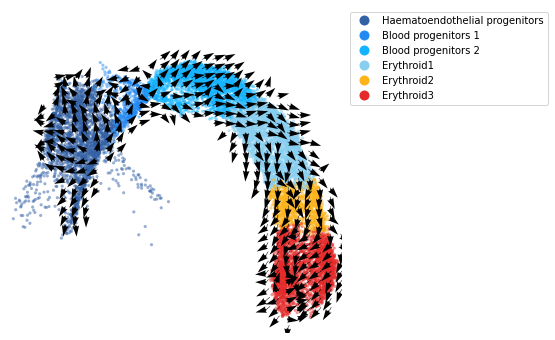

time: 7.26 s (started: 2022-05-05 13:07:09 -05:00)


In [29]:
%autoreload 2

fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=0.5, s=10,
             velocity=True, custom_xlim=(-5,11), custom_ylim=(4,18), legend='on')
ax.axis('off')
plt.show()

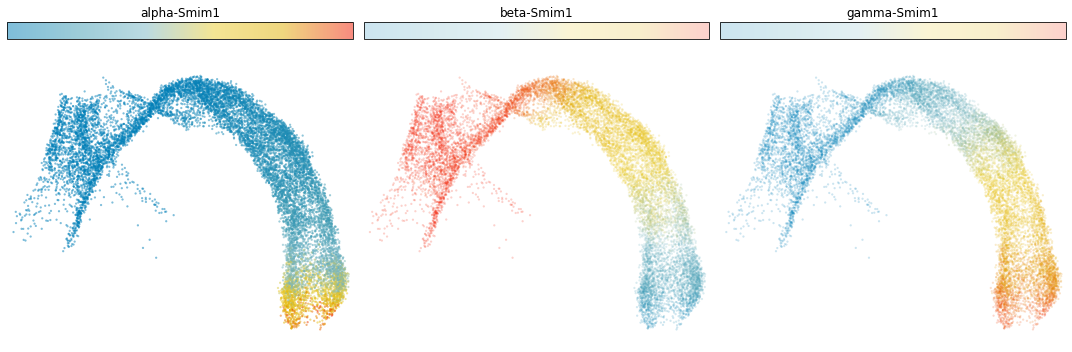

time: 5.9 s (started: 2022-05-05 09:34:06 -05:00)


In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Smim1'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

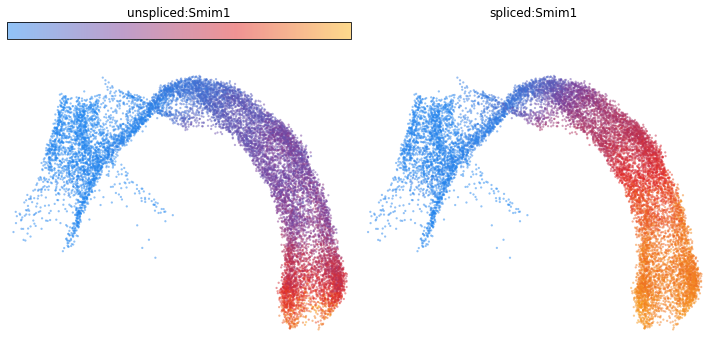

time: 3.95 s (started: 2022-05-05 09:33:10 -05:00)


In [15]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Smim1'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18), colorbar='on')
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18), colorbar='off')

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

## Estimate pseudotime

There are 2 clusters.
[0 1]



cluster  0
MAX allowed zero time cells are:  33
Only  6  cells left. Stopping.
[288, 573, 678, 721, 725, 742]

 Display reference paths for cluster 0


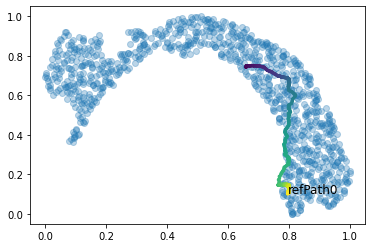


 For cluster  0



cluster  1
MAX allowed zero time cells are:  13
68  cells left.
Sampling new trajs for zero-time cells in cluster  1   ...



cluster  1
MAX allowed zero time cells are:  13
Only  1  cells left. Stopping.
[665]

 Display reference paths for cluster 1


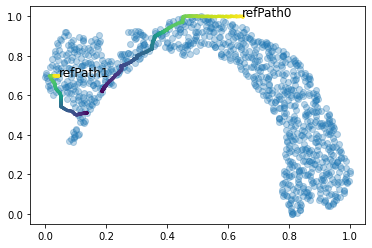


 For cluster  1

intercluster cell time adjustment
number of cells:  276
cut off is  0.035917138002744785
number of nodes:  2

Consolidating time between clusters  0  and  1 ..
pair_cellIDs:  (923, 249)
pair_cellIDs:  (419, 503)
pair_cellIDs:  (914, 63)
pair_cellIDs:  (663, 185)
pair_cellIDs:  (446, 653)
pair_cellIDs:  (290, 112)
pair_cellIDs:  (557, 539)
pair_cellIDs:  (293, 232)

 peak mode:  most_frequent_shift


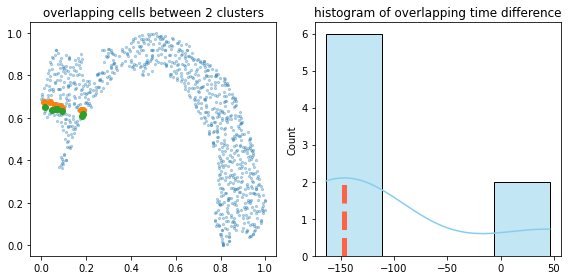

shift time is:  -149 .
The overlapping cells are: 
cell  293  from cluster  0  and  232  from cluster  1


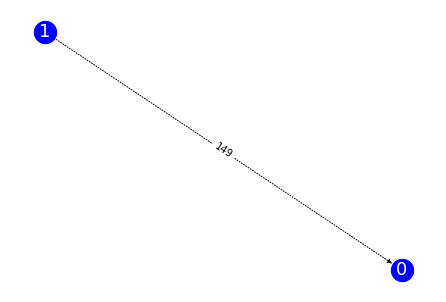

[0, 1]



All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  951
cut off is  0.0658450468615426
number of nodes:  2

Consolidating time between clusters  0  and  1 ..
pair_cellIDs:  (670, 703)
pair_cellIDs:  (382, 157)
pair_cellIDs:  (369, 33)
pair_cellIDs:  (23, 172)
pair_cellIDs:  (616, 384)
pair_cellIDs:  (165, 242)
pair_cellIDs:  (374, 856)

 peak mode:  most_frequent_shift


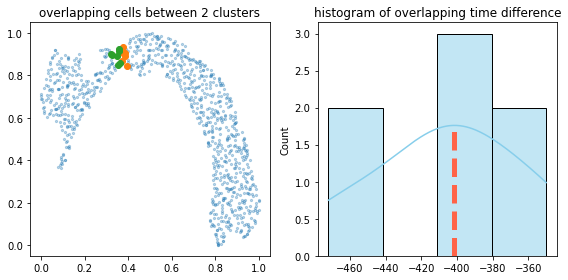

shift time is:  -403 .
The overlapping cells are: 
cell  23  from cluster  0  and  172  from cluster  1


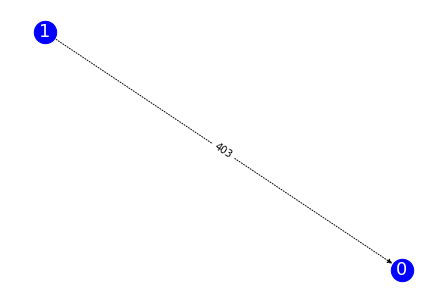

[0, 1]


All inter cluster cell time has been resolved.



There are 12329 cells.
--- 494.61866331100464 seconds ---
time: 8min 14s (started: 2022-05-05 16:08:37 -05:00)


In [30]:
%autoreload 2

cell_time = dict()
dt = 0.01
#t_total = {dt:int(10/dt)} 
t_total = {0.01: 10000}
n_repeats = 10

grid = (20,20)
pseudo_time(
    load_cellDancer, 
    grid, 
    dt, 
    t_total[dt], 
    n_repeats, 
    downsample_step)


## Graph representation of the cell fates


In [248]:
#!conda install -c pyviz holoviews bokeh -y
%autoreload 2
import pandas as pd 
import numpy as np
import os
import networkx as nx

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle
from celldancer.utilities import extract_from_df

time: 1.15 ms (started: 2022-05-04 10:19:06 -05:00)


In [534]:
def layout_graph(data, radius):
    def create_KNN_based_graph():
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(radius = radius)
        neigh.fit(embedding_ds)
        nn_graph = neigh.radius_neighbors_graph(embedding_ds, mode='connectivity')
        nn_array = nn_graph.toarray()
   
        # nn_array is effectively the edge list
        # Keep track of cells of 0 timeshift.
        node_list = [(i, {'ptime': ptime_ds[i,0], 'cluster':clusters_ds[i]}) 
                     for i in range(len(embedding_ds))]
        
        dtime = ptime_ds[:,0] - ptime_ds
        INF = 100./np.min(np.abs(dtime[dtime != 0]))

        # upper triangle of the knn array (i<j and nn_array[i,j] = 1)
        edge_filter = np.triu(nn_array, k=1)
        (i,j) = np.where(edge_filter != 0)

        # for forcedirected layouts, 
        # edge length is positively correlated with weight.
        # hence 1/dtime here as the weight
        # Created for directed graph
        edge_list = list()
        for a,b,w in zip(i,j, dtime[i,j]):
            if w>0:
                edge_list.append((a, b, 1/w))
            elif w<0:
                edge_list.append((b, a, -1/w))
            else:
                #print(a,b)
                edge_list.append((a, b, INF))

        G = nx.Graph()
        G.add_nodes_from(node_list)
        G.add_weighted_edges_from(edge_list)

        return G
    
    
    embedding = extract_from_df(data, ['embedding1', 'embedding2'])
    sample_cells = load_cellDancer['velocity1'][:n_cells].dropna().index
    clusters = extract_from_df(data, ['clusters'])
    ptime = extract_from_df(data, ['pseudotime'])
    
    embedding_ds = embedding[sample_cells]
    ptime_ds = ptime[sample_cells]
    clusters_ds = clusters[sample_cells]

    G = create_KNN_based_graph()
    
    index = np.array(range(len(embedding_ds)), dtype=int)[:,None]
    
    # NOTE!!!
    # the third column of nodes df has to be "index"
    nodes = pd.DataFrame(np.hstack((index, embedding_ds, ptime_ds, clusters_ds)), 
                         columns=['name','x','y','ptime','clusters'])
    
    edges = pd.DataFrame([(i[0], i[1], G.edges[i]['weight']) for i in G.edges], 
                         columns=['source', 'target', 'weight'])   
    return G, nodes, edges


G, nodes, edges = layout_graph(load_cellDancer, 1)

time: 4.06 s (started: 2022-05-04 14:48:29 -05:00)
